# Wine Quality Prediction Using Machine Learning(Python)

# Attribute Information:

## Input variables (based on physicochemical tests):
### 1 - fixed acidity
### 2 - volatile acidity
### 3 - citric acid
### 4 - residual sugar
### 5 - chlorides
### 6 - free sulfur dioxide
### 7 - total sulfur dioxide
### 8 - density
### 9 - pH
### 10 - sulphates
### 11 - alcohol
## Output variable (based on sensory data):
### 12 - quality (score between 0 and 10)

### Dataset link -- https://www.kaggle.com/shelvigarg/wine-quality-dataset?select=winequalityN.csv

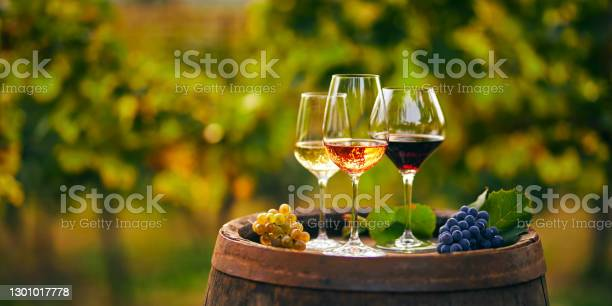

In [1]:

   
  
from IPython.display import Image
Image(filename='wine.jpg') 

# Importing all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


### Loading the Data 

In [3]:
df=pd.read_csv('winequalityN.csv')

In [4]:
df.shape

(6497, 13)

In [5]:
# First three observations
df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Data Visualization

### Lets check the distribution of Data:

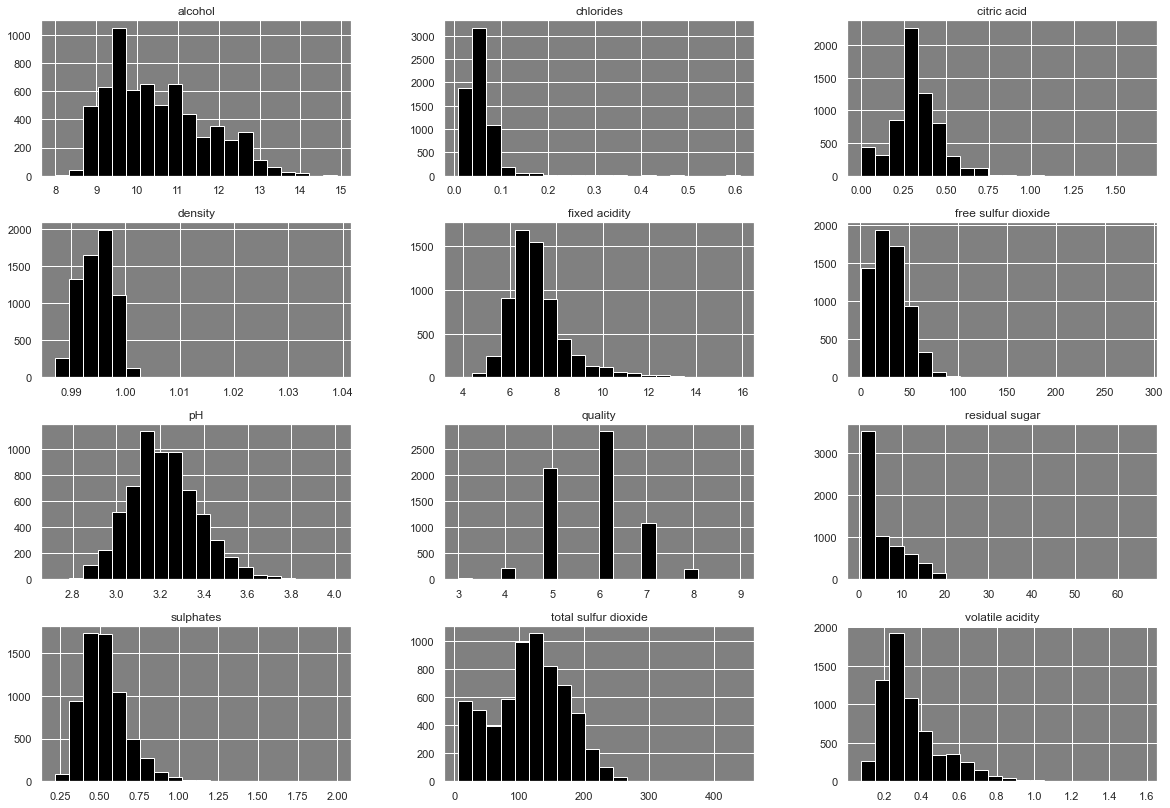

In [7]:
sns.set(rc={'axes.facecolor':'grey'})
df.hist(bins=20,figsize=(20,14),color='black')
plt.show()

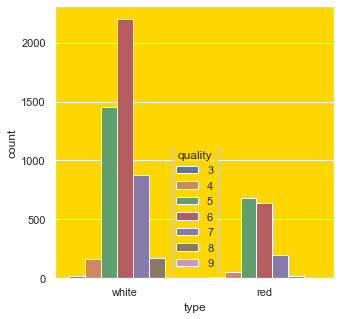

In [8]:
sns.set(rc={'axes.facecolor':'gold'})
plt.figure(figsize=(5,5))
sns.countplot(x='type',hue='quality',data=df)

plt.show()

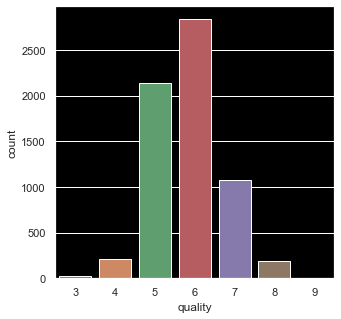

In [9]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.countplot(x='quality',data=df)
plt.show()

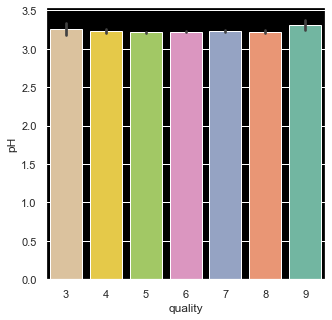

In [10]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=df,palette='Set2_r')
plt.show()

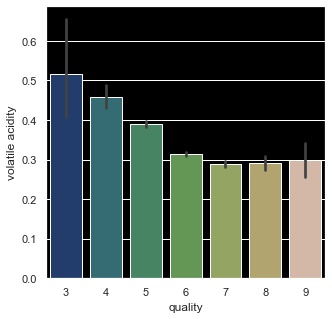

In [11]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df,palette='gist_earth')
plt.show()

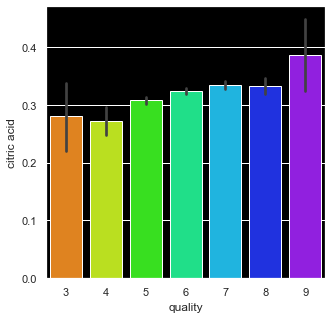

In [12]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df,palette='gist_rainbow')
plt.show()

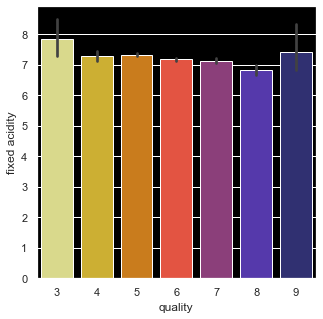

In [13]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=df,palette='CMRmap_r')
plt.show()

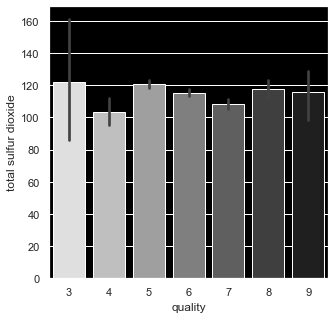

In [14]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=df,palette='gray_r')
plt.show()

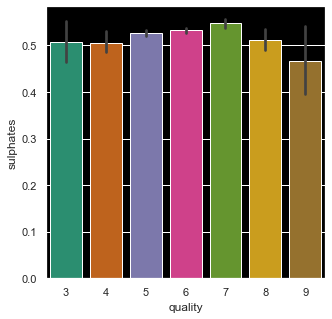

In [15]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=df,palette='Dark2')
plt.show()

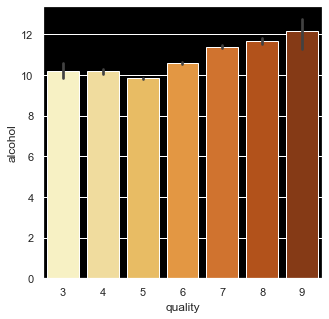

In [16]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=df,palette='YlOrBr')
plt.show()

### Co-Relation using heatmap(seaborn)

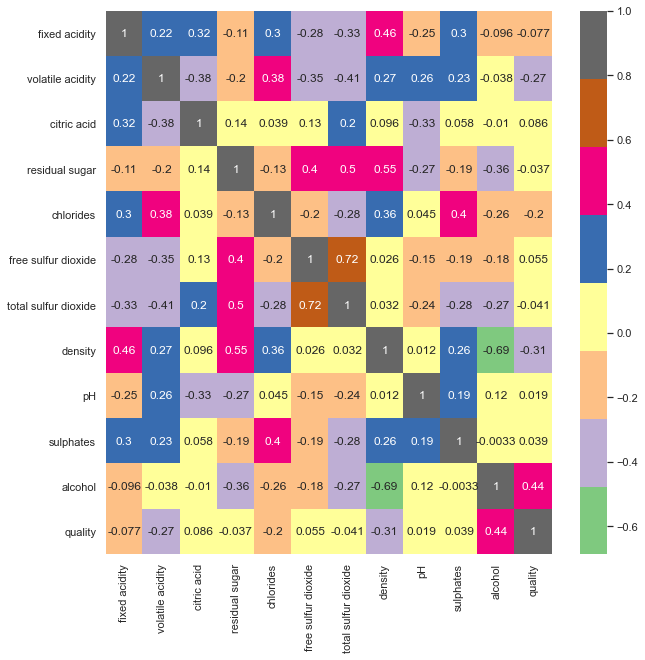

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cbar=True,cmap='Accent')
plt.show()

### Checking Null values

In [18]:
df.isna().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

### Since, this dataset contains very less number of null values so we can drop them

In [19]:
df.dropna(axis=0,inplace=True)

# Label Encoding ---  
### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.Machine learning algorithms can then decide in a better way how those labels must be operated.It is an important pre-processing step for the structured dataset in supervised learning.



In [20]:
df['type']=LabelEncoder().fit_transform(df['type'])

# Feature Selection (Using SelectKBest & chi2)

In [21]:
x=df.drop('quality',axis=1)
y=df.quality

# SelectKBest -
### The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training.

In [22]:
kbest=SelectKBest(score_func=chi2,k=10)
feature=kbest.fit(x,y)

In [23]:
feature.scores_

array([2.88207701e+01, 1.10119432e+01, 4.25649834e+01, 3.63014905e+00,
       2.20115243e+02, 6.38601408e+00, 8.91417922e+02, 1.24013979e+03,
       6.52829647e-03, 9.50651980e-02, 1.06858035e+00, 2.00627560e+02])

In [24]:
score=pd.DataFrame(feature.scores_,columns=['Score'])
col=pd.DataFrame(x.columns,columns=['Feature'])

In [25]:
fea=pd.concat([col,score],axis=1)

In [26]:
fea

,Feature,Score
0,type,28.820770
1,fixed acidity,11.011943
2,volatile acidity,42.564983
3,citric acid,3.630149
4,residual sugar,220.115243
5,chlorides,6.386014
6,free sulfur dioxide,891.417922
7,total sulfur dioxide,1240.139794
8,density,0.006528
9,pH,0.095065


In [27]:
imp_feature=fea.nlargest(9,'Score')

In [28]:
imp_feature

,Feature,Score
7,total sulfur dioxide,1240.139794
6,free sulfur dioxide,891.417922
4,residual sugar,220.115243
11,alcohol,200.627560
2,volatile acidity,42.564983
0,type,28.820770
1,fixed acidity,11.011943
5,chlorides,6.386014
3,citric acid,3.630149


### Important features are (['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar',alcohol', 'volatile acidity', 'type', 'fixed acidity','chlorides','citric acid'])
 
       '


In [29]:
df2=[]
for col in imp_feature.Feature:
    df2.append(col)

In [30]:
df2=df[df2]

In [31]:
df2.head()

,total sulfur dioxide,free sulfur dioxide,residual sugar,alcohol,volatile acidity,type,fixed acidity,chlorides,citric acid
0,170.0,45.0,20.7,8.8,0.27,1,7.0,0.045,0.36
1,132.0,14.0,1.6,9.5,0.30,1,6.3,0.049,0.34
2,97.0,30.0,6.9,10.1,0.28,1,8.1,0.050,0.40
3,186.0,47.0,8.5,9.9,0.23,1,7.2,0.058,0.32
4,186.0,47.0,8.5,9.9,0.23,1,7.2,0.058,0.32


## If the quality is greater than or equal to 6 then the quality is good otherwise bad.
### Here 1 means Good Quality
###              0 means bad Quality

In [32]:
y=y.apply(lambda i: 1 if i>=6 else 0)

# Feature Scaling
### Normalizing the data
why do we need Feature Scaling?
1.we need this technique for learning models that rely on metrics(like KNN).
2.different features scale cause different ratio in updating the values.
we can compare features.
increase the performance.
Remember that: we have to scale the unseen data in the feauture. harder or different interpretability of feature coeff.

Two techniques of scaling:
Standardization: rescale data to have mean=0 and standard_deviation=1
Normalization: all data values to be between 0-1.

Note: we do not use scaling on labels

In [33]:
sc=MinMaxScaler()

In [34]:
df2=sc.fit_transform(df2)



In [35]:
df2=pd.DataFrame(df2)

In [36]:
df2.shape

(6463, 9)

## Splitting the Data 

In [37]:
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=.25,random_state=0)

# Model Building


In [38]:
np.isnan(df2.sum().any())# Checking is there any null values or not

False

In [39]:
np.isfinite(df2.sum().all())# Checking is it finite or not

True

### Logistic Regression

In [40]:
lr=LogisticRegression(max_iter=1000)

In [41]:
lrmodel=lr.fit(x_train,y_train)

In [42]:
print('Accuracy with LogisticRegression : ' + str(round(lrmodel.score(x_train,y_train),2)*100) + '%')# training data accuracy

Accuracy with LogisticRegression : 74.0%


In [43]:
lrpred=lrmodel.predict(x_test)

In [44]:
print('Accuracy with LogisticRegression : ' + str(round(accuracy_score(y_test,lrpred),2)*100) + '%')# test data accuracy

Accuracy with LogisticRegression : 75.0%


In [45]:
print(confusion_matrix(y_test, lrpred))

[[337 253]
 [151 875]]


In [46]:
print('classification Report of Logistic Regression\n',classification_report(y_test, lrpred))

classification Report of Logistic Regression
               precision    recall  f1-score   support

           0       0.69      0.57      0.63       590
           1       0.78      0.85      0.81      1026

    accuracy                           0.75      1616
   macro avg       0.73      0.71      0.72      1616
weighted avg       0.74      0.75      0.74      1616



### Random Forest Classifier

In [47]:
rf=RandomForestClassifier()

In [48]:
rfmodel=rf.fit(x_train,y_train)

In [49]:
print('Accuracy with RandomForestClassifier (train data) : '
      + str(round(rfmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with RandomForestClassifier (train data) : 100.0%


In [50]:
rfpred=rfmodel.predict(x_test)

In [51]:
print('Accuracy with RandomForestClassifier : ' + str(round(accuracy_score(y_test,rfpred),2)*100) + '%')# test data accuracy

Accuracy with RandomForestClassifier : 83.0%


### DecisionTreeClassifier

In [52]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=10)

In [53]:
treemodel=tree.fit(x_train,y_train)

In [54]:
print('Accuracy with DecisionTreeClassifier (train data) : '
      + str(round(treemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with DecisionTreeClassifier (train data) : 88.0%


In [55]:
treepred=treemodel.predict(x_test)

In [56]:
print('Accuracy with DecisionTreeClassifier : ' + str(round(accuracy_score(y_test,treepred),2)*100) + '%')# test data accuracy

Accuracy with DecisionTreeClassifier : 76.0%


In [57]:
print(confusion_matrix(y_test, treepred))

[[395 195]
 [187 839]]


In [58]:
print('classification Report of DecisionTreeClassifier\n',classification_report(y_test, treepred))

classification Report of DecisionTreeClassifier
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       590
           1       0.81      0.82      0.81      1026

    accuracy                           0.76      1616
   macro avg       0.75      0.74      0.74      1616
weighted avg       0.76      0.76      0.76      1616



### XGBoost(XGBClassifier)

In [59]:
xgb=XGBClassifier(n_estimators=300,max_depth=4)

In [60]:
xgbmodel=xgb.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
print('Accuracy with XGBClassifier (train data) : '
      + str(round(xgbmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with XGBClassifier (train data) : 97.0%


In [62]:
xgbpred=xgbmodel.predict(x_test)

In [63]:
print('Accuracy with XGBClassifier : ' + str(round(accuracy_score(y_test,xgbpred),2)*100) + '%')# test data accuracy

Accuracy with XGBClassifier : 80.0%


In [64]:
print(confusion_matrix(y_test, xgbpred))

[[424 166]
 [152 874]]


In [65]:
print('classification Report of XGBClassifier\n',classification_report(y_test, xgbpred))

classification Report of XGBClassifier
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       590
           1       0.84      0.85      0.85      1026

    accuracy                           0.80      1616
   macro avg       0.79      0.79      0.79      1616
weighted avg       0.80      0.80      0.80      1616



### Gradient Boosting Machine(GradientBoostingClassifier)

In [66]:
gbm=GradientBoostingClassifier(n_estimators=700,max_depth=4,learning_rate=0.09)

In [67]:
gbmmodel=gbm.fit(x_train,y_train)

In [68]:
print('Accuracy with GradientBoostingClassifier (train data) : '
      + str(round(gbmmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with GradientBoostingClassifier (train data) : 96.0%


In [69]:
gbmpred=gbmmodel.predict(x_test)

In [70]:
print('Accuracy with GradientBoostingClassifier : ' + str(round(accuracy_score(y_test,gbmpred),2)*100) + '%')#test data accuracy

Accuracy with GradientBoostingClassifier : 81.0%


In [71]:
print(confusion_matrix(y_test, gbmpred))

[[421 169]
 [135 891]]


In [72]:
print('classification Report of GradientBoostingClassifier\n',classification_report(y_test, gbmpred))

classification Report of GradientBoostingClassifier
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       590
           1       0.84      0.87      0.85      1026

    accuracy                           0.81      1616
   macro avg       0.80      0.79      0.79      1616
weighted avg       0.81      0.81      0.81      1616



###  K-Nearest Neighbors(KNeighborsClassifier)

In [73]:
knn=KNeighborsClassifier(n_neighbors=19)

In [74]:
knnmodel=knn.fit(x_train,y_train)

In [75]:
print('Accuracy with KNeighborsClassifier (train data) : '
      + str(round(knnmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with KNeighborsClassifier (train data) : 77.0%


In [76]:
knnpred=knnmodel.predict(x_test)

In [77]:
print('Accuracy with KNeighborsClassifier : ' + str(round(accuracy_score(y_test,knnpred),2)*100) + '%')# test data accuracy

Accuracy with KNeighborsClassifier : 76.0%


In [78]:
print(confusion_matrix(y_test, knnpred))

[[371 219]
 [174 852]]


In [79]:
print('classification Report of KNeighborsClassifier\n',classification_report(y_test, knnpred))

classification Report of KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       590
           1       0.80      0.83      0.81      1026

    accuracy                           0.76      1616
   macro avg       0.74      0.73      0.73      1616
weighted avg       0.75      0.76      0.75      1616



# Hyper Parameter Tuning for random forest(Using RandomizedSearchCV)

In [80]:
#from pprint import pprint

In [81]:
''''

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
'''

"'\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\npprint(random_grid)\n"

In [82]:
'''
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
'''

'\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(x_train, y_train)\n'

In [83]:
#rf_random.best_params_

In [84]:
rf_tune=RandomForestClassifier(n_estimators=1800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= None,
 bootstrap= True)

In [85]:
rf_tunemodel=rf_tune.fit(x_train,y_train)

In [86]:
print('Accuracy with RandomForestClassifier (train data) : '
      + str(round(rf_tunemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with RandomForestClassifier (train data) : 99.0%


In [87]:
rf_tunepred=rf_tunemodel.predict(x_test)

In [88]:
print('Accuracy with RandomForestClassifier : ' + str(round(accuracy_score(y_test,rf_tunepred),2)*100) + '%')# test data accuracy

Accuracy with RandomForestClassifier : 83.0%


In [89]:
print(confusion_matrix(y_test, rf_tunepred))

[[435 155]
 [117 909]]


In [90]:
print('classification Report of Random Forest Classifier\n',classification_report(y_test, rf_tunepred))

classification Report of Random Forest Classifier
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       590
           1       0.85      0.89      0.87      1026

    accuracy                           0.83      1616
   macro avg       0.82      0.81      0.82      1616
weighted avg       0.83      0.83      0.83      1616



# Model Comparison

In [91]:
models=[['Logistic Regression',str(round(lrmodel.score(x_train,y_train),2)*100) + '%',
        str(round(accuracy_score(lrpred,y_test),2)*100) + '%'],
    ['Random Forest',str(round(rf_tunemodel.score(x_train,y_train),2)*100) + '%',
    str(round(accuracy_score(rf_tunepred,y_test),2)*100) + '%'],
    ['XGBClassifier',str(round(xgbmodel.score(x_train,y_train),2)*100) + '%',
    str(round(accuracy_score(xgbpred,y_test),2)*100) + '%',],
    ['KNeighborsClassifier',str(round(knnmodel.score(x_train,y_train),2)*100) + '%',
    str(round(accuracy_score(knnpred,y_test),2)*100) + '%'],
    ['GradientBoostingClassifier',str(round(gbmmodel.score(x_train,y_train),2)*100) + '%',
    str(round(accuracy_score(gbmpred,y_test),2)*100) + '%'],
    ['DecisionTreeClassifier',str(round(treemodel.score(x_train,y_train),2)*100) + '%',
    str(round(accuracy_score(treepred,y_test),2)*100) + '%']]
     

In [92]:
pd.DataFrame(models,columns= ['Model Name', 'Accuracy(train)','Accuracy(test)'])

,Model Name,Accuracy(train),Accuracy(test)
0,Logistic Regression,74.0%,75.0%
1,Random Forest,99.0%,83.0%
2,XGBClassifier,97.0%,80.0%
3,KNeighborsClassifier,77.0%,76.0%
4,GradientBoostingClassifier,96.0%,81.0%
5,DecisionTreeClassifier,88.0%,76.0%


# Conclusion: So, according to the analysis we can see that RandomForestClassifier gives best result.Hence, RandomForestClassifier is the best fit model.